# Use examples for numerical calculations
This jupyter notebook can be found at:
[https://github.com/environmentalscience/essm/blob/master/docs/examples/examples_numerics.ipynb](https://github.com/environmentalscience/essm/blob/master/docs/examples/examples_numerics.ipynb)

Below, we will import variable and equation defintions that were previously exported from api_features.ipynb
by running the file `test_equation_definitions.py`:

In [1]:
from IPython.display import display
from sympy import init_printing, latex
init_printing() 
from sympy.printing import StrPrinter
StrPrinter._print_Quantity = lambda self, expr: str(expr.abbrev)    # displays short units (m instead of meter)

In [2]:
%run -i 'test_equation_definitions.py'

/home/stan/Programs/essm/essm/variables/_core.py:89: UserWarning: "test_variable_definitions:p_Dva1" will be overridden by "__main__:<class '__main__.eq_Dva.p_Dva1'>"
  instance[expr] = instance
/home/stan/Programs/essm/essm/variables/_core.py:89: UserWarning: "test_variable_definitions:p_Dva2" will be overridden by "__main__:<class '__main__.eq_Dva.p_Dva2'>"
  instance[expr] = instance
/home/stan/Programs/essm/essm/variables/_core.py:89: UserWarning: "test_variable_definitions:p_alpha2" will be overridden by "__main__:<class '__main__.eq_alphaa.p_alpha2'>"
  instance[expr] = instance
/home/stan/Programs/essm/essm/variables/_core.py:89: UserWarning: "test_variable_definitions:p_alpha1" will be overridden by "__main__:<class '__main__.eq_alphaa.p_alpha1'>"
  instance[expr] = instance
/home/stan/Programs/essm/essm/variables/_core.py:89: UserWarning: "test_variable_definitions:p_ka2" will be overridden by "__main__:<class '__main__.eq_ka.p_ka2'>"
  instance[expr] = instance
/home/stan/Pro

## Numerical evaluations
See here for detailed instructions on how to turn sympy expressions into code: https://docs.sympy.org/latest/modules/codegen.html

We will first list all equations defined in this worksheet:

In [3]:
for eq in Equation.__registry__.keys():
        print(eq.definition.name + ': ' + str(eq))

eq_Le: Eq(Le, alpha_a/D_va)
eq_Cwa: Eq(C_wa, P_wa/(R_mol*T_a))
eq_Nu_forced_all: Eq(Nu, -Pr**(1/3)*(-37*Re**(4/5) + 37*(Re + Re_c - Abs(Re - Re_c)/2)**(4/5) - 664*sqrt(Re + Re_c - Abs(Re - Re_c)/2))/1000)
eq_Dva: Eq(D_va, T_a*p_Dva1 - p_Dva2)
eq_alphaa: Eq(alpha_a, T_a*p_alpha1 - p_alpha2)
eq_ka: Eq(k_a, T_a*p_ka1 + p_ka2)
eq_nua: Eq(nu_a, T_a*p_nua1 - p_nua2)
eq_rhoa_Pwa_Ta: Eq(rho_a, (M_N2*P_N2 + M_O2*P_O2 + M_w*P_wa)/(R_mol*T_a))
eq_Pa: Eq(P_a, P_N2 + P_O2 + P_wa)
eq_PN2_PO2: Eq(P_N2, P_O2*x_N2/x_O2)
eq_ideal_gas_law: Eq(P_g*V_g, R_mol*T_g*n_g)
eq_Pwa_CC: Eq(P_wa, p_CC1*exp(-M_w*lambda_E*(-1/p_CC2 + 1/T_g)/R_mol))
eq1: Eq(P_wa, Piecewise((0, T_a < 0), (p_CC1*exp(-M_w*lambda_E*(-1/p_CC2 + 1/T_g)/R_mol), True)))
eq_Pwa_Delta: Eq(P_wa, P_wa1 + Integral(Delta_Pwa, (T_g, T_a1, T_a2)))
eq_PO2: Eq(P_O2, (P_a*x_O2 - P_wa*x_O2)/(x_N2 + x_O2))
eq_PN2: Eq(P_N2, (P_a*x_N2 - P_wa*x_N2)/(x_N2 + x_O2))
eq_rhoa: Eq(rho_a, (x_N2*(M_N2*P_a - P_wa*(M_N2 - M_w)) + x_O2*(M_O2*P_a - P_wa*(M_O2 - M_w)))/(

### Substitution of equations and values into equations
The easiest way is to define a dictionary with all variables we want to substitute as keys. We start with the default variables and then add more. First, however, we will define a function to display the contents of a dictionary:

In [4]:
def print_dict(vdict, list_vars=None):
    """Print values and units of variables in vdict."""
    if not list_vars:
        list_vars = vdict.keys()
    for var1 in list_vars:
        unit1 = var1.definition.unit
        if unit1 == 1:
            unit1 = ''
        if vdict[var1] is not None:
            print('{0}: {1} {2}'.format(var1.name, str(vdict[var1]), str(unit1)))

In [5]:
vdict = Variable.__defaults__.copy()
print_dict(vdict)

c_pa: 1010.0 J/(K*kg)
c_pamol: 29.19 J/(K*mol)
c_pv: 1864 J/(K*kg)
g: 9.81 m/s**2
lambda_E: 2450000.0 J/kg
M_air: 0.02897 kg/mol
M_N2: 0.028 kg/mol
M_O2: 0.032 kg/mol
M_w: 0.018 kg/mol
R_mol: 8.314472 J/(K*mol)
sigm: 5.67e-08 J/(K**4*m**2*s)
T0: 273.15 K
x_N2: 0.79 
x_O2: 0.21 
p_Dva1: 1.49e-07 m**2/(K*s)
p_Dva2: 1.96e-05 m**2/s
p_alpha1: 1.32e-07 m**2/(K*s)
p_alpha2: 1.73e-05 m**2/s
p_ka1: 6.84e-05 J/(K**2*m*s)
p_ka2: 0.00563 J/(K*m*s)
p_nua1: 9e-08 m**2/(K*s)
p_nua2: 1.13e-05 m**2/s
p_CC1: 611.0 Pa
p_CC2: 273.0 K


We can substitute a range of equations into each other by using the custom function `subs_eq`:

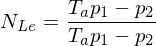

In [6]:
from essm.variables.utils import subs_eq
subs_eq(eq_Le, [eq_alphaa, eq_Dva])

We can also use subs_eq to substitute equations into each other and a dictionary with values. We will first add an entry for T_a into the dictionary and then substitute:

In [7]:
vdict[T_a] = 300.
subs_eq(eq_Le, [eq_alphaa, eq_Dva], vdict)

### Evaluation of equations for long lists of variable sets
Substitution of variables into equations takes a lot of time if they need to be evaluated for a large number of variables. We can use theano to speed this up:

In [8]:
#import theano
from sympy.printing.theanocode import theano_function
import numpy as np

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


We will now create two long lists of values representing T_g and n_g respectively and show how long it takes to compute ideal gas law values.

In [9]:
npoints = 10000
xmin = 290.
xmax = 310.
Tvals = np.arange(xmin, xmax, (xmax - xmin)/npoints)
xmin = 0.1
xmax = 0.5
nvals = np.arange(xmin, xmax, (xmax-xmin)/npoints)

In [10]:
%%time
# looping
expr = eq_ideal_gas_law.rhs.subs(Variable.__defaults__)
resvals0 = []
for i in range(len(Tvals)):
    resvals0.append(expr.subs({T_g: Tvals[i], n_g: nvals[i]}))

CPU times: user 7.46 s, sys: 43.4 ms, total: 7.5 s
Wall time: 7.68 s


In [11]:
%%time
# Using theano
f1 = theano_function([T_g, n_g], [eq_ideal_gas_law.rhs.subs(Variable.__defaults__)], dims={T_g:1, n_g:1})
resvals1 = f1(Tvals,nvals)

CPU times: user 106 ms, sys: 11.7 ms, total: 118 ms
Wall time: 623 ms


In [12]:
list(resvals0) == list(resvals1)

True

**Both approaches give identical results, but `theano_function` makes it a lot faster.**

### Numerical solution
Some equations cannot be solved analytically for a given variable, e.g. eq_Nu_forced_all cannot be solved analytically for Re if Nu is given, so we can use numerical solvers instead:

In [13]:
from sympy import nsolve

In [14]:
vdict = Variable.__defaults__.copy()
vdict[Pr] = 0.71
vdict[Re_c] = 3000.
vdict[Nu] = 1000.
expr = eq_Nu_forced_all.subs(vdict)
nsolve(expr, 1000.)

Now applying to a long list of Nu-values:

In [15]:
npoints = 100
xmin = 1000.
xmax = 1200.
Nuvals = np.arange(xmin, xmax, (xmax - xmin)/npoints)

In [16]:
%%time
# Solving for a range of Nu values
vdict = Variable.__defaults__.copy()
vdict[Pr] = 0.71
vdict[Re_c] = 3000.
resvals = []
for Nu1 in Nuvals:
    vdict[Nu] = Nu1
    resvals.append(nsolve(eq_Nu_forced_all.subs(vdict), 1000.))

CPU times: user 1.56 s, sys: 3.9 ms, total: 1.56 s
Wall time: 1.56 s


We will now again use a theano function to make it faster. First we import optimize from scipy and preapre the theano_function:

In [17]:
import scipy.optimize as sciopt
vdict = Variable.__defaults__.copy()
vdict[Pr] = 0.71
vdict[Re_c] = 3000.
expr = eq_Nu_forced_all.subs(vdict)
expr1 = expr.rhs - expr.lhs
fun_tf = theano_function([Re, Nu], [expr1], dims={Nu:1, Re:1})
x0vals = np.full(Nuvals.shape, fill_value=2000.) # array of same shape as Nuvals, with initial guess

In [18]:
%%time
# Solving for a range of Nu values
resvals1 = sciopt.fsolve(fun_tf, args=Nuvals, x0=x0vals)

CPU times: user 7.35 ms, sys: 0 ns, total: 7.35 ms
Wall time: 7.24 ms


In [19]:
np.mean(abs((resvals - resvals1)/resvals))

**Using theano and scipy makes it 2 orders of magnitude faster and the results are different only by 10$^{-10}$%!**
**Note, however, that scipy gets slowed down for large arrays, so it is more efficient to re-run it repreatedly with subsections of the arra:**

In [20]:
npoints = 1000
xmin = 1000.
xmax = 1200.
Nuvals = np.arange(xmin, xmax, (xmax - xmin)/npoints)
x0vals = np.full(Nuvals.shape, fill_value=2000.)

In [21]:
%%time
# Solving for a range of Nu values
resvals1 = sciopt.fsolve(fun_tf, args=Nuvals, x0=x0vals)

CPU times: user 1.6 s, sys: 4.13 ms, total: 1.61 s
Wall time: 1.61 s


We will now test that we can process Nuvals bit by bit and re-create it consistently:

In [22]:
# Solving for a range of Nu values
imax = len(Nuvals)
i0 = 0
idiff = 100
i1 = i0
resvals2 = []
while i1 < imax - 1:
    i0 = i1    # note that resvals[0:2] + resvals[2:4] = resvals[0:4]
    i1 = min(i0+idiff, imax)
    resvals0 = Nuvals[i0:i1]
    resvals2 = np.append(resvals2,resvals0)
print(list(resvals2) == list(Nuvals))

True


Now we will run fsolve for portions of Nuvals bit by bit:

In [23]:
%%time
# Solving for a range of Nu values
imax = len(Nuvals)
i0 = 0
idiff = 100
i1 = i0
resvals2 = []
while i1 < imax - 1:
    i0 = i1    # note that resvals[0:2] + resvals[2:4] = resvals[0:4]
    i1 = min(i0+idiff, imax)
    resvals0 = sciopt.fsolve(fun_tf, args=Nuvals[i0:i1], x0=x0vals[i0:i1])
    resvals2 = np.append(resvals2,resvals0)

CPU times: user 56.5 ms, sys: 16 µs, total: 56.5 ms
Wall time: 56 ms


In [24]:
np.mean(abs((resvals1 - resvals2)/resvals1))

**It is strange that resvals1 and resvals2 are different at all, but anyway, it is clear that slicing the data in relatively small portions is important to keep `scipy.optimize.fsolve` time-efficient.**

### Generate code from sympy expressions and execute
Need to install gfortran system-wide first!

In [25]:
from sympy.utilities.autowrap import autowrap

In [26]:
from sympy import symbols
x, y, z = symbols('x y z')
expr = ((x - y + z)**(13)).expand()
autowrap_func = autowrap(expr)

In [27]:
%%time
autowrap_func(1, 4, 2)

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 13.4 µs


In [28]:
%%time
expr.subs({x:1, y:4, z:2})

CPU times: user 70 ms, sys: 3.77 ms, total: 73.8 ms
Wall time: 72.4 ms


Use of `autowrap` made the calculation 3 orders of magnitude faster than substitution of values into the original expression!

Another way is to use `binary_function`:

In [29]:
from sympy.utilities.autowrap import binary_function
f = binary_function('f', expr)

In [30]:
%%time
f(x,y,z).evalf(2, subs={x:1, y:4, z:2})

CPU times: user 2.47 ms, sys: 0 ns, total: 2.47 ms
Wall time: 2.65 ms


However, for the above example, `binary_function` was 2 orders of magnitude slower than `autowrap`.